# Quantum Computing for Breast Cancer Diagnosis: Neural Network Classifiers and Regression"

GITA KARTIKA | A11.2021.13812

In [1]:
!pip install qiskit pylatexenc qiskit_machine_learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. READ DATA

In [3]:
df = pd.read_csv("dataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,...,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473,NaN
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116,NaN
491,91376702,B,17.850,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.04178,...,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871,NaN
463,911320501,B,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,...,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863,NaN
289,89143601,B,11.370,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,...,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994,NaN
62,858986,M,14.250,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,...,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320,NaN
35,854253,M,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,...,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633,NaN
349,899147,B,11.950,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.01787,...,17.72,83.09,496.2,0.12930,0.18850,0.03122,0.04766,0.3124,0.07590,NaN
512,915691,M,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,NaN
127,866203,M,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,...,25.73,148.20,1538.0,0.10210,0.22640,0.32070,0.12180,0.2841,0.06541,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## 2. CLEANING DATA

In [9]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
print(df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

['M' 'B']
diagnosis
B    357
M    212
Name: count, dtype: int64


In [12]:
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [0, 1])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
dia_col = df.pop('diagnosis')
df.insert(30, 'diagnosis', dia_col)

In [15]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
df = df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst',
                        'perimeter_worst', 'area_worst', 'smoothness_worst',
                        'compactness_worst', 'concavity_worst', 'concave points_worst',
                        'symmetry_worst', 'fractal_dimension_worst'], axis=1)

In [17]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [18]:
df.shape

(569, 11)

Negative (0):  357
Positive (1):  212


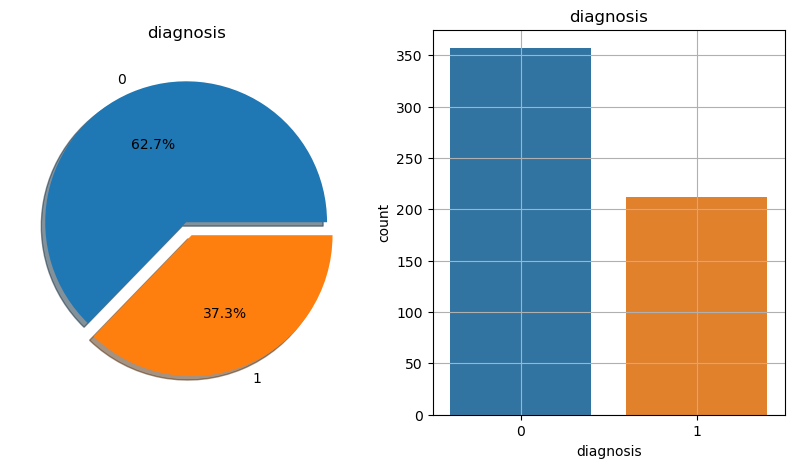

In [19]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

df['diagnosis'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')


sns.countplot(x='diagnosis', data=df, ax=ax[1])
ax[1].set_title('diagnosis')
N, P = df['diagnosis'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'diagnosis'}>, <Axes: >]], dtype=object)

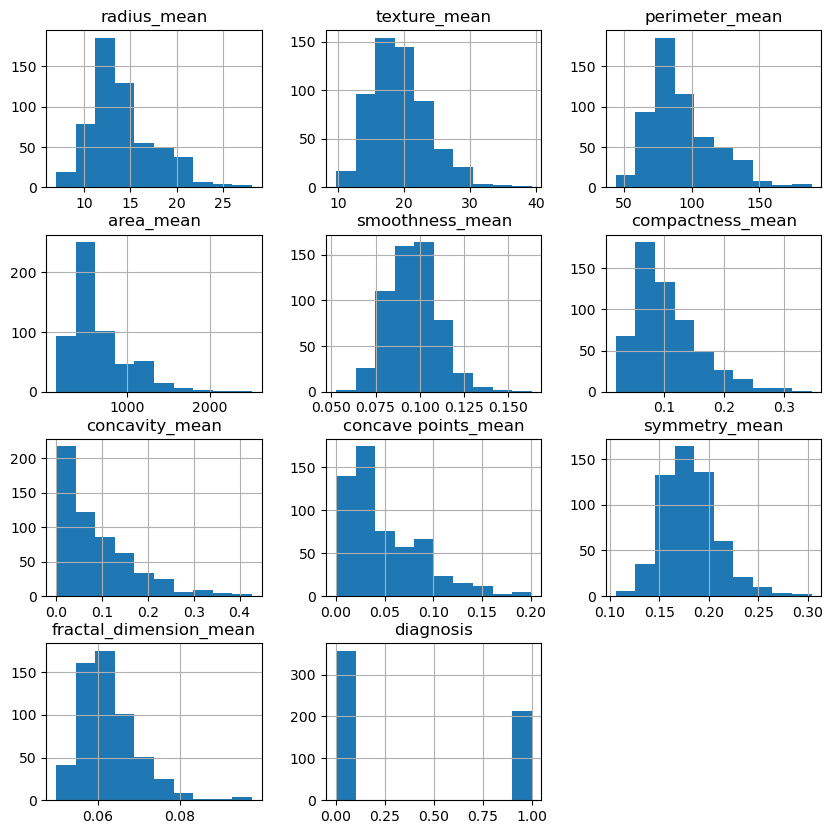

In [20]:
df.hist(bins=10, figsize=(10, 10))

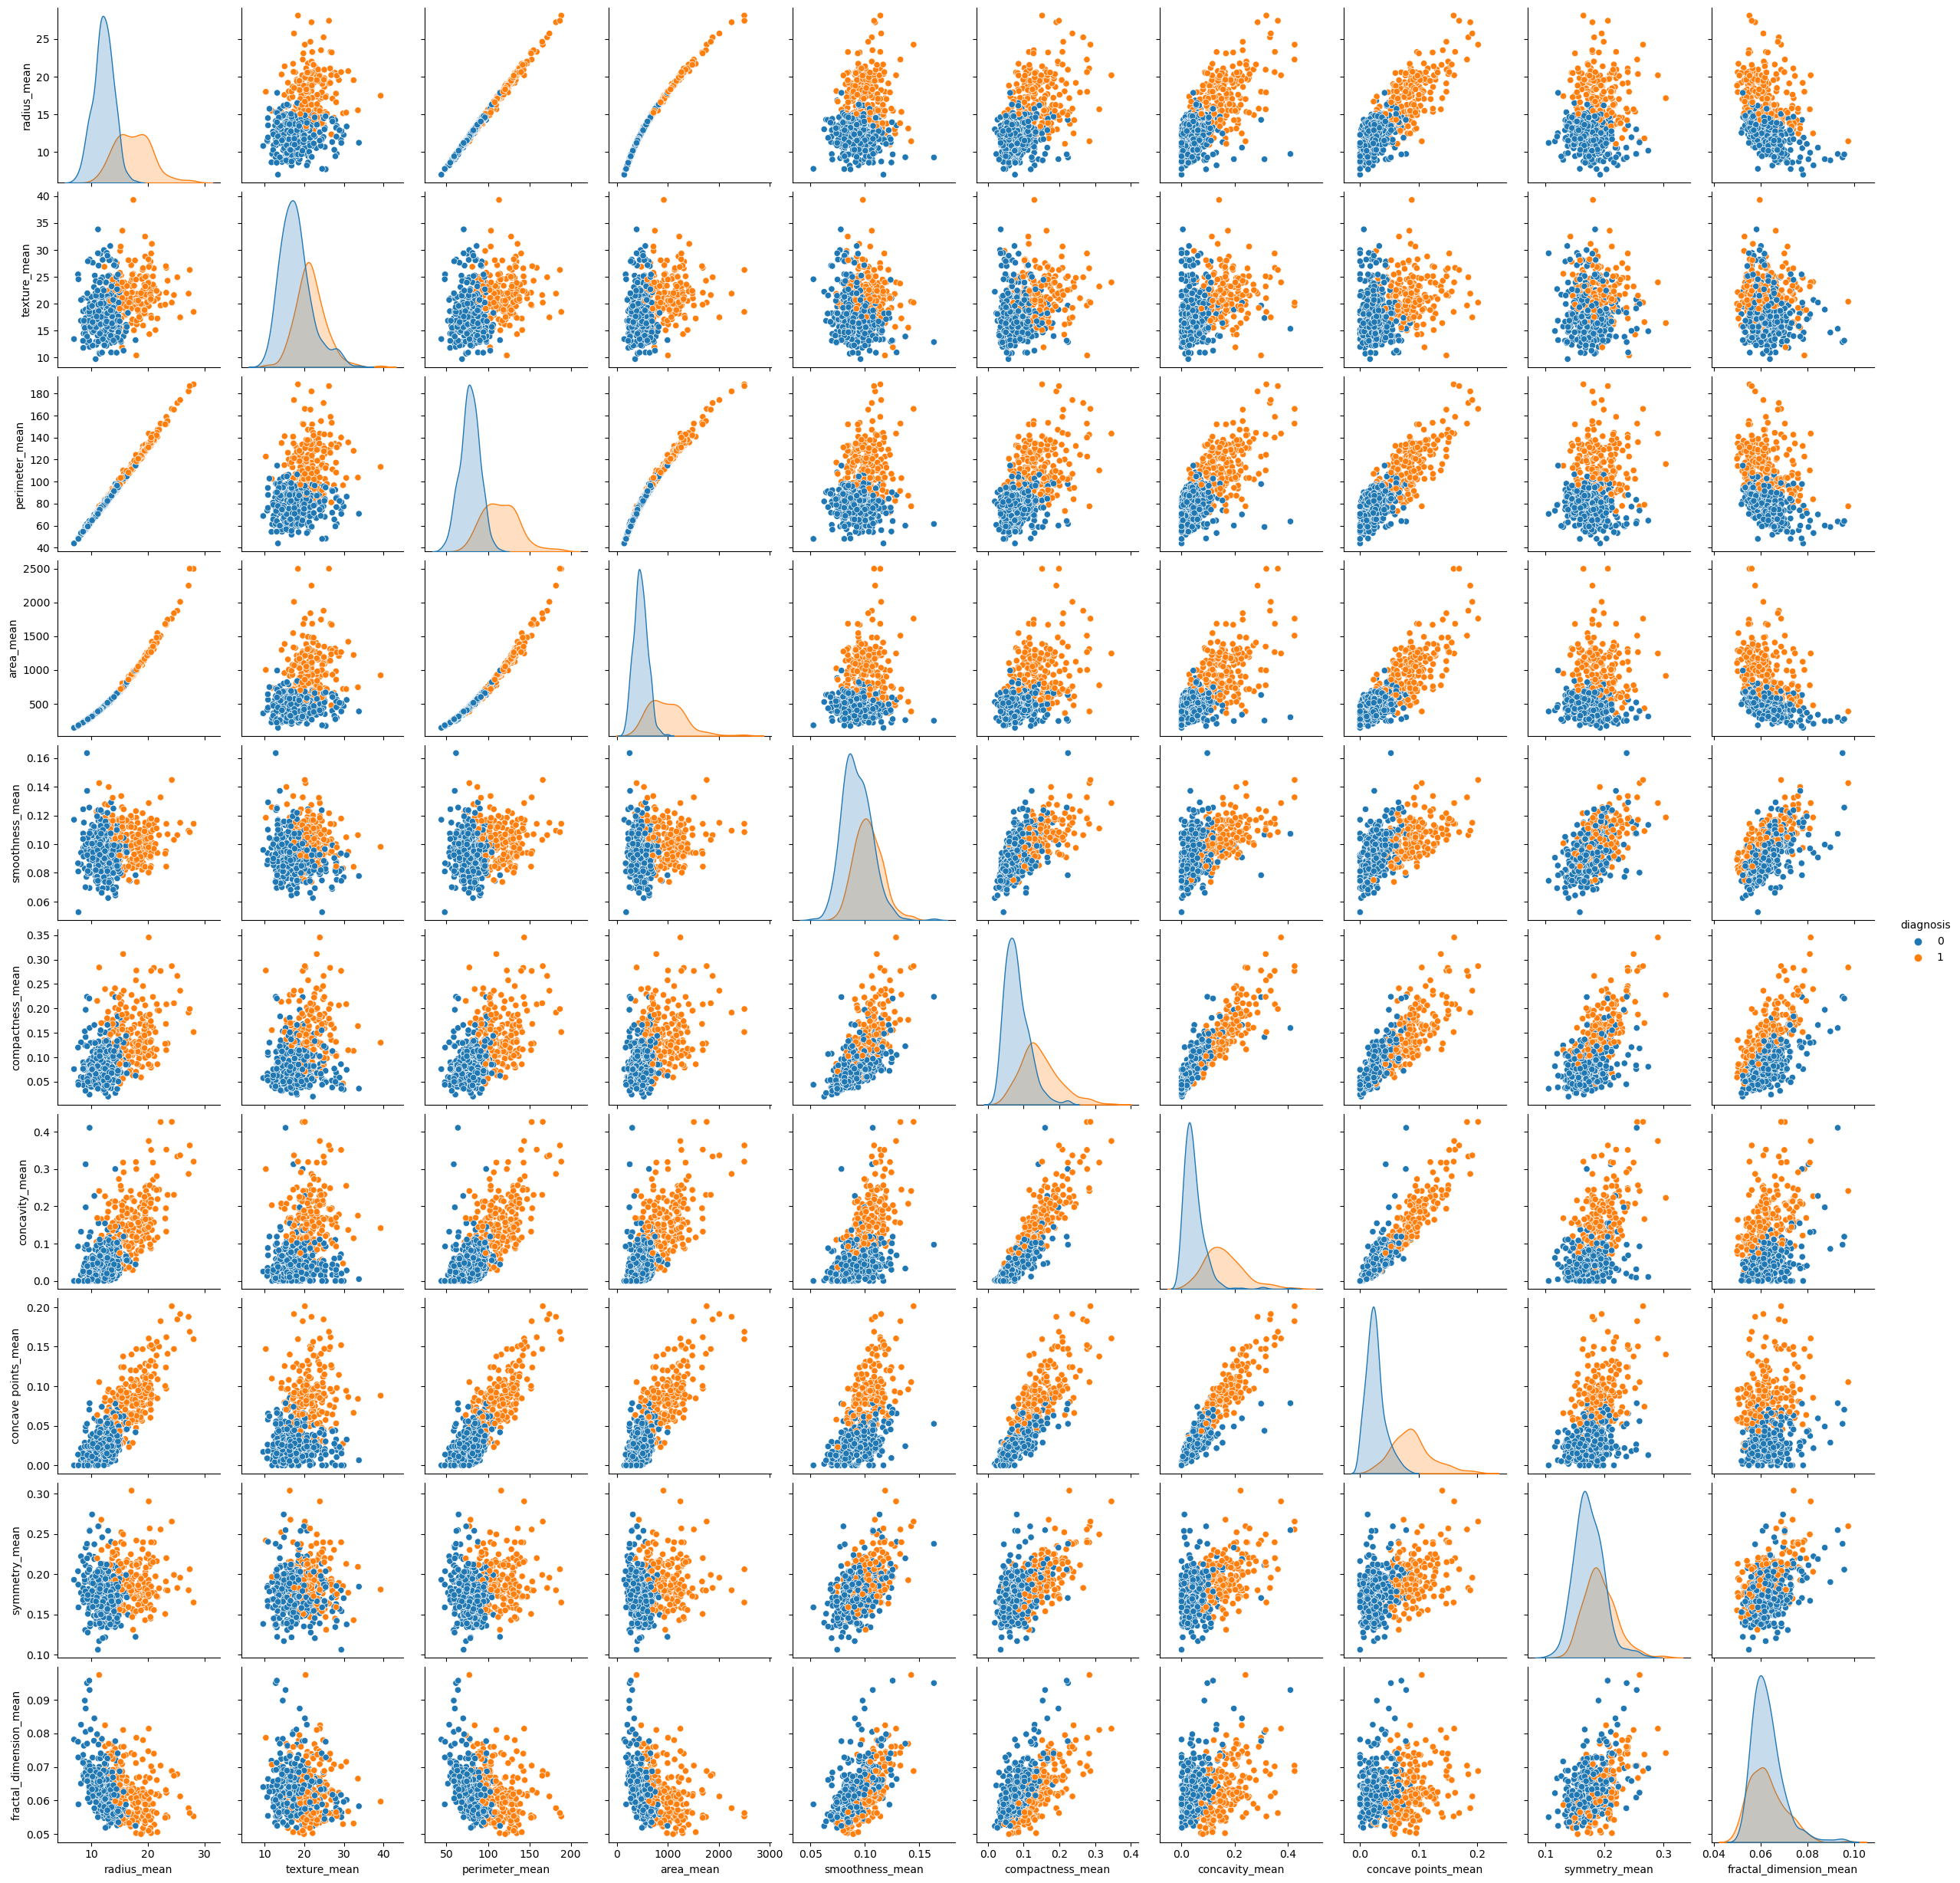

In [21]:
sns.pairplot(df, hue='diagnosis')

In [22]:
required_col = 'diagnosis' 
labels = df[required_col]
x = df.drop(required_col, axis=1)

In [23]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [24]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## 3. PREPROCESSIG

In [25]:
from sklearn.preprocessing import MinMaxScaler

x = MinMaxScaler().fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.73111332, 0.68636364,
        0.60551811],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.34875746, 0.37979798,
        0.14132266],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.63568588, 0.50959596,
        0.21124684],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.26351889, 0.26767677,
        0.13732098],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.7554672 , 0.67525253,
        0.42544229],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.26616162,
        0.18702612]])

## 4. QUANTUM SUPPORT VECTOR MACHINE IMPLEMENTATION

In [26]:
pip install qiskit-aer qiskit-algorithms

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, f1_score
from qiskit import Aer, QuantumCircuit, execute
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

from IPython.display import clear_output

from qiskit import Aer
from qiskit.providers.aer import Aer
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.utils import QuantumInstance
from qiskit.opflow import PauliSumOp
from qiskit.opflow import StateFn
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit.algorithms.optimizers import COBYLA, ADAM, L_BFGS_B, GradientDescent, QNSPSA, AQGD, GradientDescentState, SLSQP

In [28]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Buat binary class
indexes = np.array([i for (i, s) in enumerate(y) if (s == 0 or s == 1)])
x = x[indexes]
y = 2 * y[indexes] - 1

In [29]:
# Scaler

x = MinMaxScaler().fit_transform(x)

In [30]:
# Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
# Ofv

objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [32]:

num_qubits = x.shape[1]

print("Number of qubits needed:", num_qubits)

Number of qubits needed: 10


### A. CLASSIFIER

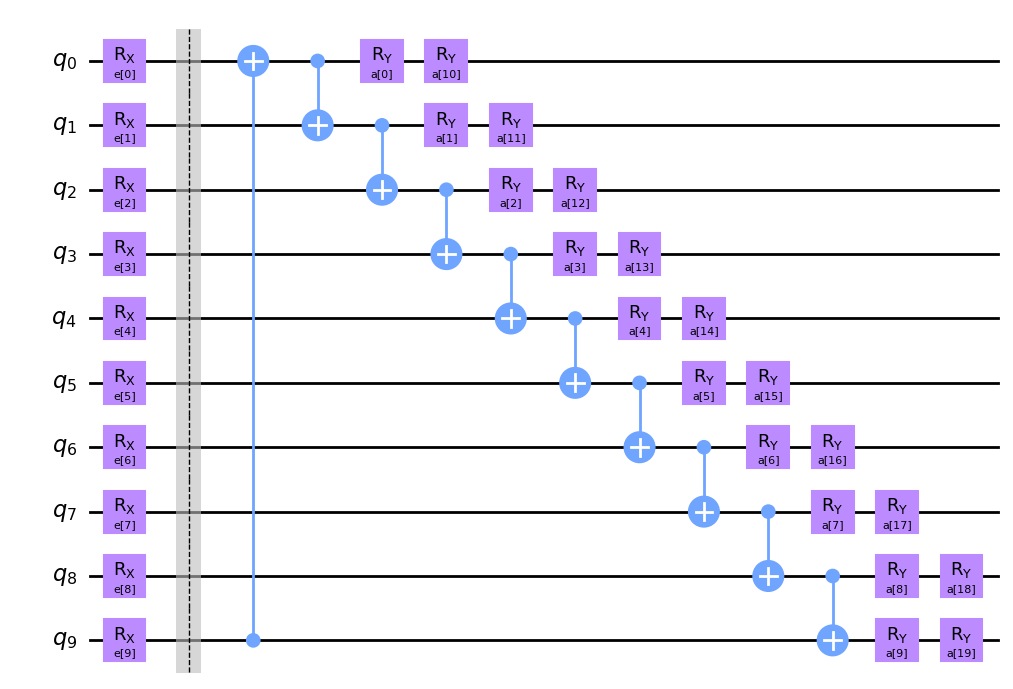

In [33]:
# Parameter
num_qubits       = 10
backend          = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend)
optimizer        = COBYLA(maxiter=100)
params_encoding  = ParameterVector('e', num_qubits)
params_ansatz    = ParameterVector('a', num_qubits * 2)
observable = PauliSumOp.from_list([("Z" * num_qubits, 1.0)])

circuit          = QuantumCircuit(num_qubits)

# Encoding
for i in range(num_qubits):
    circuit.rx(params_encoding[i], i)

circuit.barrier()

# Ansatz
for k in range(num_qubits):
    circuit.cx(k-1, k)
for j in range(num_qubits * 2):
    circuit.ry(params_ansatz[j], j % num_qubits)

# QNN classifier
qnn_expectation  = StateFn(observable, is_measurement=True) @ StateFn(circuit)
estimator_qnn    = EstimatorQNN(
    circuit=circuit, 
    observables=observable, 
    input_params=params_encoding, 
    weight_params=params_ansatz
)
qnn = NeuralNetworkClassifier(
    estimator_qnn, optimizer=optimizer, loss='squared_error', callback=callback_graph
)

# Plot sirkuit
circuit.draw(output='mpl', style="clifford")

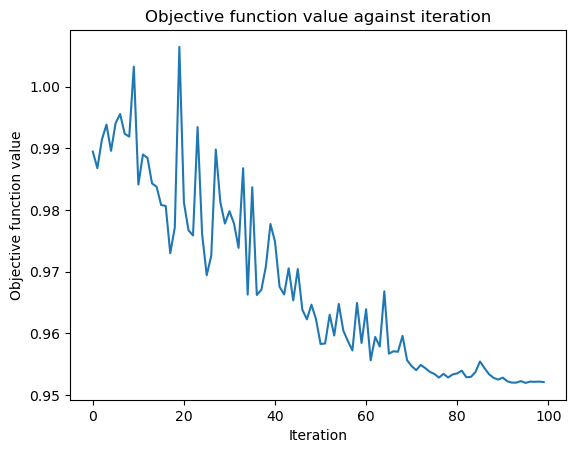

In [34]:
qnn.fit(x_train, y_train)

In [35]:
y_pred_tr = qnn.predict(x_train)
y_pred_ts = qnn.predict(x_test)

print('TRAIN:')
report_tr      = classification_report(y_train, y_pred_tr)
print(report_tr)

print('TEST:')
report_ts      = classification_report(y_test, y_pred_ts)
print(report_ts)

TRAIN:
              precision    recall  f1-score   support

          -1       0.92      0.07      0.12       165
           1       0.65      1.00      0.79       290

    accuracy                           0.66       455
   macro avg       0.78      0.53      0.46       455
weighted avg       0.75      0.66      0.55       455

TEST:
              precision    recall  f1-score   support

          -1       1.00      0.04      0.08        47
           1       0.60      1.00      0.75        67

    accuracy                           0.61       114
   macro avg       0.80      0.52      0.42       114
weighted avg       0.76      0.61      0.47       114



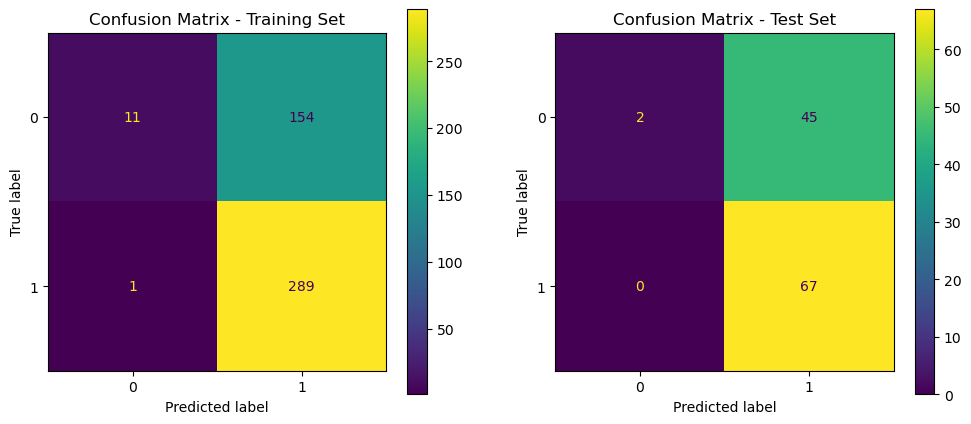

In [36]:
cm_tr   = confusion_matrix(y_train, y_pred_tr)
disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_tr)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
disp_tr.plot(ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')

cm_ts   = confusion_matrix(y_test, y_pred_ts)
disp_ts = ConfusionMatrixDisplay(confusion_matrix=cm_ts)
disp_ts.plot(ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')

plt.show()

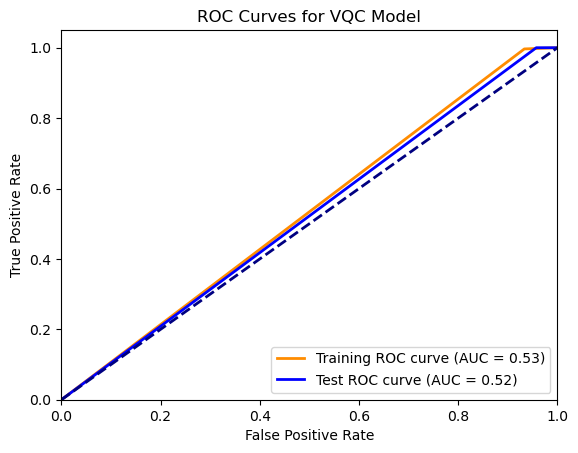

In [37]:
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_pred_tr)
roc_auc_tr        = auc(fpr_tr, tpr_tr)
fpr_ts, tpr_ts, _ = roc_curve(y_test, y_pred_ts)
roc_auc_ts        = auc(fpr_ts, tpr_ts)

plt.figure()
plt.plot(fpr_tr, tpr_tr, color='darkorange', lw=2, label=f'Training ROC curve (AUC = {roc_auc_tr:0.2f})')
plt.plot(fpr_ts, tpr_ts, color='blue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_ts:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for VQC Model')
plt.legend(loc="lower right")
plt.show()

### B. REGRESSION

In [38]:
pip install qiskit-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install --upgrade qiskit-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, f1_score
from qiskit import Aer, QuantumCircuit, execute
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

from IPython.display import clear_output

from qiskit import Aer
from qiskit.providers.aer import Aer
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.utils import QuantumInstance
from qiskit.opflow import PauliSumOp
from qiskit.opflow import StateFn
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.algorithms.optimizers import COBYLA, ADAM, L_BFGS_B, GradientDescent, QNSPSA, AQGD, GradientDescentState, SLSQP
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor

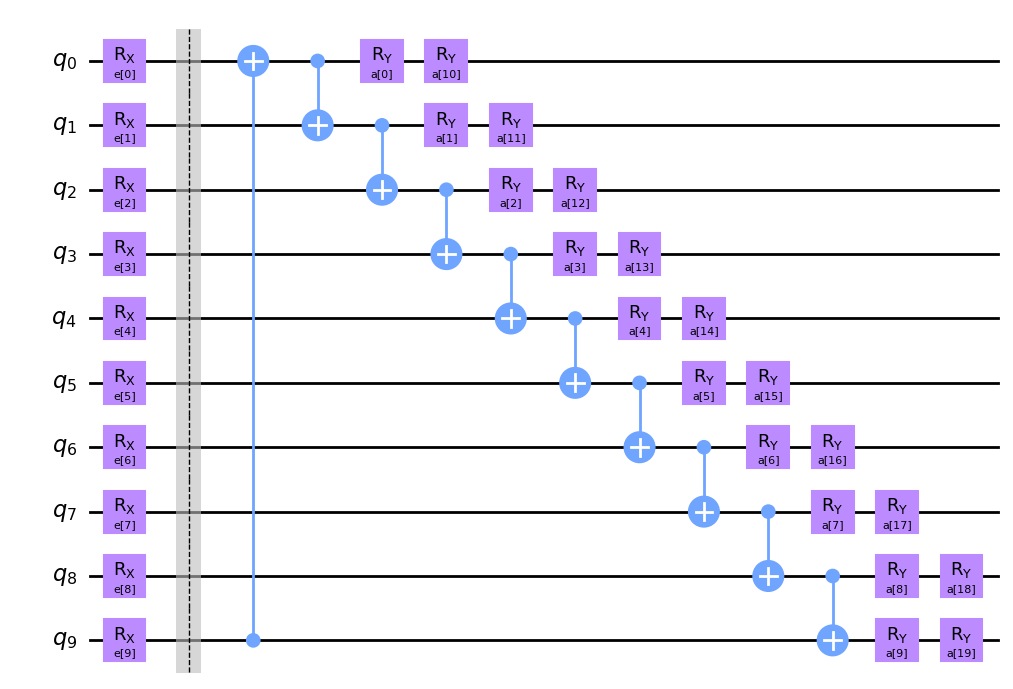

In [41]:
# Parameter
num_qubits       = 10
backend          = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend)
optimizer        = COBYLA(maxiter=100)
params_encoding  = ParameterVector('e', num_qubits)
params_ansatz    = ParameterVector('a', num_qubits * 2)
observable = PauliSumOp.from_list([("Z" * num_qubits, 1.0)])

circuit          = QuantumCircuit(num_qubits)

# Encoding
for i in range(num_qubits):
    circuit.rx(params_encoding[i], i)

circuit.barrier()

# Ansatz
for k in range(num_qubits):
    circuit.cx(k-1, k)
for j in range(num_qubits * 2):
    circuit.ry(params_ansatz[j], j % num_qubits)

# QNN Regression
qnn_expectation  = StateFn(observable, is_measurement=True) @ StateFn(circuit)
estimator_qnn    = EstimatorQNN(
    circuit=circuit, 
    observables=observable, 
    input_params=params_encoding, 
    weight_params=params_ansatz
)
qnn = NeuralNetworkRegressor(
    estimator_qnn, optimizer=optimizer, loss='squared_error', callback=callback_graph
)

# Plot sirkuit
circuit.draw(output='mpl', style="clifford")

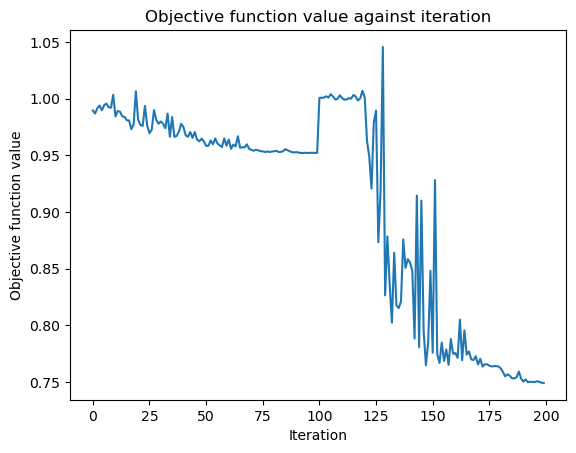

In [42]:
qnn.fit(x_train, y_train)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
y_pred_tr = qnn.predict(x_train)
y_pred_ts = qnn.predict(x_test)

print('TRAIN:')
mse_train = mean_squared_error(y_train, y_pred_tr)
mae_train = mean_absolute_error(y_train, y_pred_tr)
r2_train = r2_score(y_train, y_pred_tr)

print(f'Mean Squared Error: {mse_train}')
print(f'Mean Absolute Error: {mae_train}')
print(f'R^2 Score: {r2_train}')

# Calculate and print regression metrics for test data
print('TEST:')
mse_test = mean_squared_error(y_test, y_pred_ts)
mae_test = mean_absolute_error(y_test, y_pred_ts)
r2_test = r2_score(y_test, y_pred_ts)

print(f'Mean Squared Error: {mse_test}')
print(f'Mean Absolute Error: {mae_test}')
print(f'R^2 Score: {r2_test}')

TRAIN:
Mean Squared Error: 0.7493793079950178
Mean Absolute Error: 0.8132940157985666
R^2 Score: 0.1894448733664129
TEST:
Mean Squared Error: 0.7938336310335891
Mean Absolute Error: 0.8392297494079225
R^2 Score: 0.1809572984350173


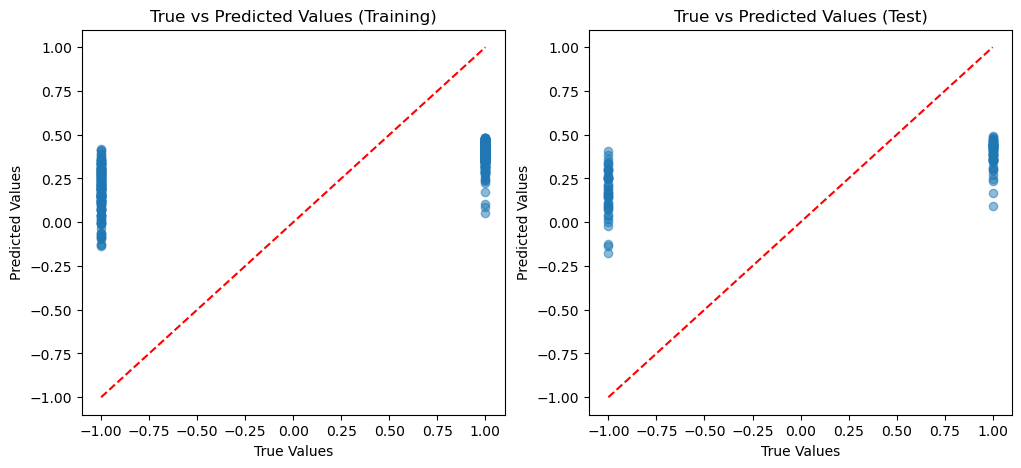

In [45]:
import matplotlib.pyplot as plt

# Predict the values
y_pred_tr = qnn.predict(x_train)
y_pred_ts = qnn.predict(x_test)

# Plot True vs Predicted for Training Data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_tr, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Training)')

# Plot True vs Predicted for Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ts, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test)')

plt.show()


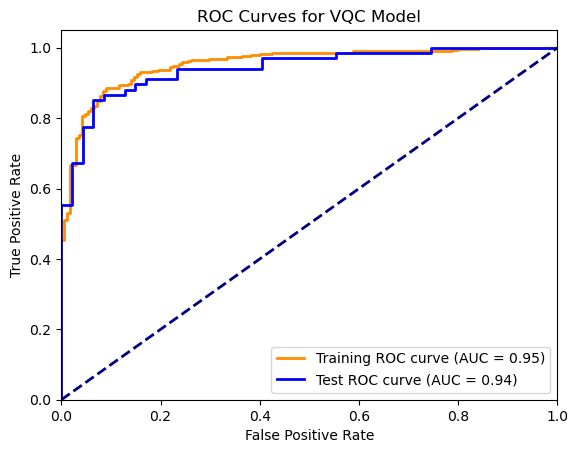

In [46]:
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_pred_tr)
roc_auc_tr        = auc(fpr_tr, tpr_tr)
fpr_ts, tpr_ts, _ = roc_curve(y_test, y_pred_ts)
roc_auc_ts        = auc(fpr_ts, tpr_ts)

plt.figure()
plt.plot(fpr_tr, tpr_tr, color='darkorange', lw=2, label=f'Training ROC curve (AUC = {roc_auc_tr:0.2f})')
plt.plot(fpr_ts, tpr_ts, color='blue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_ts:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for VQC Model')
plt.legend(loc="lower right")
plt.show()